In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# reuseable data path
file_location = r'C:\Users\natta\Downloads\Achievement 4 project'

In [3]:
# Importing data frame 

Instacart_merged = pd.read_pickle(os.path.join(file_location, '02 Data', 'prepared data' , 'orders_products_customers_merged.pkl'))

In [4]:
Instacart_merged.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,fam_status,income
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,1,2398795,1,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2,473747,1,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,3,2254736,1,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,4,431534,1,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# Task 2. address the PII data.

In [ ]:
# In this data frame we have two columns with name as first name and last name. we wil drop this as security measeure.

In [5]:
instacart_pii = Instacart_merged.drop(columns = ['first_name', 'last_name'])

# Task 3 comparing diffrent geographic areas

In [ ]:
# 1st creating list of region labels using ' for-loop with if-statements '

In [6]:
region = []

for value in instacart_pii['state']:
    if (value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']):
        region.append('Northeast')
    elif (value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']):
        region.append('Midwest')
    elif (value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']):
        region.append('South')
    else:
        region.append('West')

In [ ]:
# 2nd creating columns on data frame as 'region'

In [7]:
# Now creating the new column
instacart_pii['region'] = region

In [8]:
# value count for the new columns 'region'

instacart_pii ['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [9]:
# Creating flags as 'low spender' and 'high spender'

instacart_pii.loc[instacart_pii['spending'] < 10, 'spending_flag'] = 'Low spender'

In [10]:
instacart_pii.loc[instacart_pii['spending'] > 10, 'spending_flag'] = 'High spender'

In [11]:
instacart_pii.head(2)

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,fam_status,income,region
0,0,2539329,1,1,2,8,NaN,196,1,0,...,30.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,1,2398795,1,2,3,7,15.0,196,1,1,...,30.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [12]:
# making cross tab as ' crosstab_sh 'to crosscheack spedning  habits 

crosstab_sh = pd.crosstab(instacart_pii['region'], instacart_pii['spending_flag'], dropna = False)

In [13]:
crosstab_sh

spending_flag,High spender,Low spender
region,,
Midwest,55706,176898
Northeast,42782,134241
South,80446,253132
West,60418,196008


In [14]:
# calculatinf percentage of high spender to look at difference on speeding in diffrent region
midwest = (55706 / (55706+176898)) * 100
northwest= (42782 /(42782 + 134241)) *100
south= (80446 /(80446 + 253132)) *100
west = (60418 /(60418 + 196008))*100

In [15]:
midwest, northwest, south, west

(23.94885728534333, 24.167481061782933, 24.116098783492916, 23.56157331939819)

In [ ]:
# spending pattern all the region is alsmost same.

# TASK 4 Create an exclusion flag for low-activity customers (less than 5 orders) and exclude them from data

In [ ]:
# creating activity flag for customer under 5 orders

In [16]:
instacart_pii.loc[instacart_pii['max_order'] < 5, 'activity_flag'] = 'Low activity customer'

In [ ]:
# creating activity flag for customer over and equal 5 orders

In [17]:
instacart_pii.loc[instacart_pii['max_order'] >= 5, 'activity_flag'] = 'Normal activity customer'

In [18]:
# Check the counts in this variable

instacart_pii['activity_flag'].value_counts(dropna = True)

Normal activity customer    937352
Low activity customer        62648
Name: activity_flag, dtype: int64

In [ ]:
# Create subset of dataframe with normal activity customers

In [19]:
df_normal_activity_customer = instacart_pii[instacart_pii['activity_flag'] == 'Normal activity customer']

In [21]:
# Export normaL-activity  customer dataframes for future use

df_normal_activity_customer.to_pickle(os.path.join(file_location,'02 Data','prepared Data','normal_activity_subset.pkl'))

In [ ]:
# Create subset of dataframe with  low activity customers

In [22]:
df_low_activity_customer = instacart_pii[instacart_pii['activity_flag'] == 'low activity customer']

In [ ]:
# Export low-activity customer dataframes for future use

In [23]:
df_low_activity_customer.to_pickle(os.path.join(file_location,'02 Data','prepared Data','low_activity_subset.pkl'))

## Task 5

In [ ]:
# creating age variable

In [25]:
# Create 'age' list

age_vari = []

for value in instacart_pii['age']:
    if (value >= 18) and (value <= 24):
        age_vari.append('18-24')
    elif (value >= 25) and (value <= 34):
        age_vari.append('25-34')
    elif (value >= 35) and (value <= 44):
        age_vari.append('35-44')
    elif (value >= 45) and (value <= 54):
        age_vari.append('45-54')
    elif (value >= 55) and (value <= 64):
        age_vari.append('55-64')
    elif (value >= 65) and (value <= 74):
        age_vari.append('65-74')
    elif (value >= 75) and (value <= 84):
        age_vari.append('75-84')
    elif (value >= 85):
        age_vari.append('85+')

In [26]:
# Assign age list to column

instacart_pii ['age_profile'] = age_vari

In [ ]:
# income variable

In [27]:
# Create 'income' list

income_vari = []

for value in instacart_pii['income']:
    if value < 25000:
        income_vari.append('0-25000')
    elif (value >= 25000) and (value <= 50000):
        income_vari.append('25000-50000')
    elif (value >= 50000) and (value <= 75000):
        income_vari.append('50000-75000')
    elif (value >= 75000) and (value <= 100000):
        income_vari.append('75000-100000')
    elif (value >= 100000) and (value <= 125000):
        income_vari.append('100000-125000')
    elif (value >= 125000) and (value <= 150000):
        income_vari.append('125000-150000')
    elif (value >= 150000) and (value <= 175000):
        income_vari.append('150000-175000')
    elif (value >= 175000) and (value <= 200000):
        income_vari.append('175000-200000')
    elif (value >= 200000) and (value <= 300000):
        income_vari.append('200000-300000')
    elif (value >= 300000) and (value <= 400000):
        income_vari.append('300000-400000')
    elif (value >= 400000) and (value <= 500000):
        income_vari.append('400000-500000')
    elif value >= 500000:
        income_vari.append('500000+')

In [28]:
# Assign income list to column

instacart_pii['income_profile'] = income_vari

In [ ]:
# Dependents variable

In [32]:
# Create 'dependents' list

dependents_vari = []

for value in instacart_pii['number_of_dependants']:
    if value == 0:
        dependents_vari.append('Non-parent')
    else:
        dependents_vari.append('Parent')

In [34]:
# Assign dependents list to column

instacart_pii['dependents_profile'] = dependents_vari

## Task 6 Create an appropriate visualization to show the distribution of profiles.

In [ ]:
# Age profile visualization

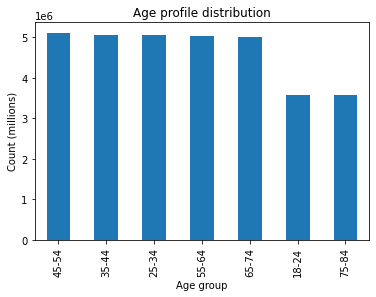

In [35]:
age_chart = instacart_pii['age_profile'].value_counts().plot.bar(color = 'tab:blue', xlabel = 'Age group', ylabel = 'Count (millions)', title = 'Age profile distribution')

In [36]:
age_chart.figure.savefig(os.path.join(file_location, '04 Analysis', 'Visualizations', 'age_profile_distribution.png'))

In [ ]:
# Income profile distribution

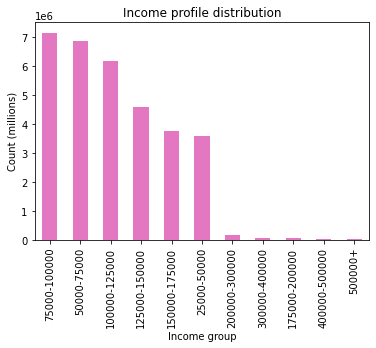

In [37]:
income_chart = instacart_pii ['income_profile'].value_counts().plot.bar(color = 'tab:pink', xlabel = 'Income group', ylabel = 'Count (millions)', title = 'Income profile distribution')

In [38]:
income_chart.figure.savefig(os.path.join(file_location, '04 Analysis', 'Visualizations', 'income_profile_distribution.png'))

In [ ]:
# Dependents profile distribution

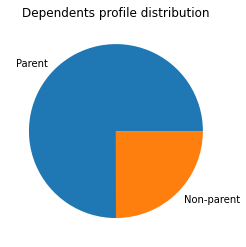

In [39]:
dependents_chart = instacart_pii['dependents_profile'].value_counts().plot.pie(title = 'Dependents profile distribution', ylabel='')

In [40]:
dependents_chart.figure.savefig(os.path.join(file_location, '04 Analysis', 'Visualizations', 'dependents_profile_distribution.png'))

## task 7. Aggregate max, min, and mean variables on customer-profile level for usage frequency and expenditure

In [43]:
# Order number by profile
instacart_pii.groupby('dependents_profile').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                           mean min max
dependents_profile                     
Non-parent            17.264622   1  99
Parent                17.101557   1  99

In [44]:
# Order number by income
instacart_pii.groupby('income_profile').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                       mean min max
income_profile                     
100000-125000     17.271478   1  99
125000-150000     17.117874   1  99
150000-175000     17.290060   1  99
175000-200000     19.145743   1  99
200000-300000     19.561127   1  99
25000-50000       15.896069   1  99
300000-400000     20.869333   1  99
400000-500000     18.736775   1  99
50000-75000       17.350705   1  99
500000+           19.393128   1  99
75000-100000      17.288477   1  99

In [45]:
# price by profile
instacart_pii.groupby('dependents_profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                         mean  min      max
dependents_profile                         
Non-parent          12.129243  1.0  99999.0
Parent              11.930584  1.0  99999.0

In [46]:
# prices by income
instacart_pii.groupby('income_profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
income_profile                          
100000-125000     9.923348  1.0  99999.0
125000-150000    11.136802  1.0  99999.0
150000-175000    14.076450  1.0  99999.0
175000-200000   248.316061  1.0  99999.0
200000-300000   260.626636  1.0  99999.0
25000-50000       6.696985  1.0     25.0
300000-400000   309.424275  1.0  99999.0
400000-500000   262.410869  1.0  99999.0
50000-75000       7.834941  1.0  14900.0
500000+         176.562997  1.0  99999.0
75000-100000      9.075728  1.0  99999.0

## Task 8 Compare customer profiles with regions and departments

In [47]:
region_spending_crosstab = pd.crosstab(instacart_pii['region'], instacart_pii['spending_flag'], dropna = False)

In [48]:
region_spending_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,55706,176898
Northeast,42782,134241
South,80446,253132
West,60418,196008


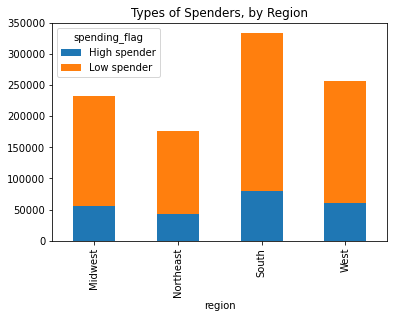

In [52]:
region_spending_chart = region_spending_crosstab.plot.bar(stacked = True,title = 'Types of Spenders, by Region')

## Project Q and A

In [ ]:
# 1.What are the busiest hours for orders?

Text(0, 0.5, 'frequency')

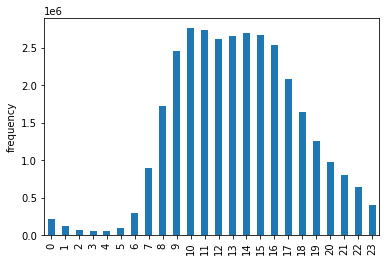

In [62]:
bar_hour = instacart_pii ['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.ylabel('frequency')

In [66]:
bar_hour.figure.savefig(os.path.join(file_location, '04 Analysis', 'Visualizations', 'bar_hour.png'))

Text(0, 0.5, 'frequency')

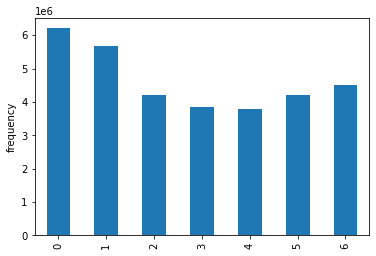

In [63]:
# What are the busiest days?

bar_days = instacart_pii ['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.ylabel('frequency')

In [65]:
bar_days.figure.savefig(os.path.join(file_location, '04 Analysis', 'Visualizations', 'bar_days.png'))

In [ ]:
#2: What times of day do people spend the most money?

In [69]:
# line chart for prices by hour
avg_price_per_hour = instacart_pii.groupby('order_hour_of_day').agg({'prices': ['mean']})

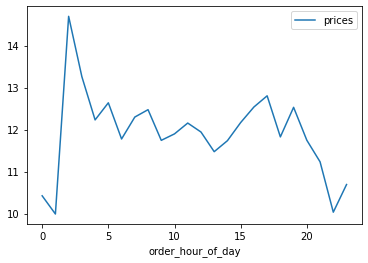

In [70]:
avg_price_per_hour_chart = sns.lineplot(data = avg_price_per_hour)

In [71]:
#exporting
avg_price_per_hour_chart.figure.savefig(os.path.join(file_location, '04 Analysis', 'Visualizations', 'avg_price_per_hour.png'))

# Task 3  Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [ ]:
# creating price range flag

In [72]:
instacart_pii.loc[(instacart_pii['prices'] >= 0) & (instacart_pii['prices'] < 7.4), 'price_range_flag'] = 'Low price group'

In [73]:
instacart_pii.loc[(instacart_pii['prices'] >= 7.4) & (instacart_pii['prices'] < 12), 'price_range_flag'] = 'Average price group'

In [74]:
instacart_pii.loc[(instacart_pii['prices'] >= 12) & (instacart_pii['prices'] < 100), 'price_range_flag'] = 'High price group'

In [75]:
instacart_pii.loc[instacart_pii['prices'] >= 100, 'price_range_flag'] = 'Extremely high price group'

In [76]:
instacart_pii['price_range_flag'].value_counts(dropna = False)

Low price group               16155666
Average price group            9645062
High price group               6599004
Extremely high price group        5127
Name: price_range_flag, dtype: int64

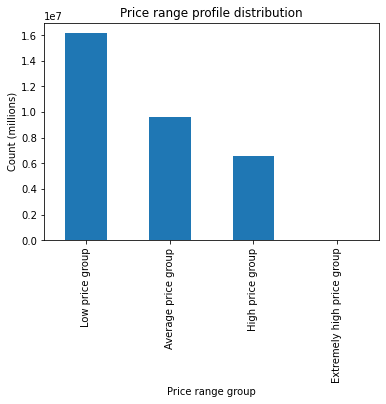

In [77]:
price_range_chart = instacart_pii ['price_range_flag'].value_counts().plot.bar(color = 'tab:blue', xlabel = 'Price range group', ylabel = 'Count (millions)', title = 'Price range profile distribution')

In [78]:
price_range_chart.figure.savefig(os.path.join(file_location, '04 Analysis', 'Visualizations', 'price_range_profile_distribution.png'))

# task 4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [ ]:
# Bar chart to show total counts of each produce category order.

In [ ]:
# creating goods/products profile

In [83]:
# Create 'goods' list

goods_profile_list = []

for value in instacart_pii['department_id']:
    if value == 1:
        goods_profile_list.append('Frozen')
    elif value == 2:
        goods_profile_list.append('Other')
    elif value == 3:
        goods_profile_list.append('Bakery')
    elif value == 4:
        goods_profile_list.append('Produce')
    elif value == 5:
        goods_profile_list.append('Alcohol')
    elif value == 6:
        goods_profile_list.append('International')
    elif value == 7:
        goods_profile_list.append('Beverages')
    elif value == 8:
        goods_profile_list.append('Pets')
    elif value == 9:
        goods_profile_list.append('Dry goods pasta')
    elif value == 10:
        goods_profile_list.append('Bulk')
    elif value == 11:
        goods_profile_list.append('Personal care')
    elif value == 12:
        goods_profile_list.append('Meat seafood')
    elif value == 13:
        goods_profile_list.append('Pantry')
    elif value == 14:
        goods_profile_list.append('Breakfast')
    elif value == 15:
        goods_profile_list.append('Canned goods')
    elif value == 16:
        goods_profile_list.append('Dairy eggs')
    elif value == 17:
        goods_profile_list.append('Household')
    elif value == 18:
        goods_profile_list.append('Babies')
    elif value == 19:
        goods_profile_list.append('Snacks')
    elif value == 20:
        goods_profile_list.append('Deli')
    elif value == 21:
        goods_profile_list.append('Missing')

In [85]:
# Assign goods list to column

instacart_pii['goods_profile'] = goods_profile_list

In [86]:
product_crosstab = pd.crosstab(instacart_pii['goods_profile'], instacart_pii['order_number'], dropna = False)

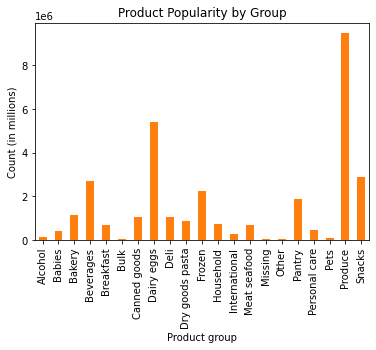

In [87]:
product_crosstab_chart = product_crosstab.plot(stacked = True, kind = 'bar', xlabel = 'Product group', ylabel = 'Count (in millions)', title = 'Product Popularity by Group', legend = None, color = 'tab:orange')

In [89]:
product_crosstab_chart.figure.savefig(os.path.join(file_location, '04 Analysis', 'Visualizations', 'product_popularity.png'))

# 5. Are there differences in ordering habits based on a customer’s loyalty status?

In [ ]:
# Comparing loyalty status with spending flag

In [92]:
loyalty_avg_price = pd.crosstab(instacart_pii['loyalty_flag'],instacart_pii['spending_flag'], dropna = False)

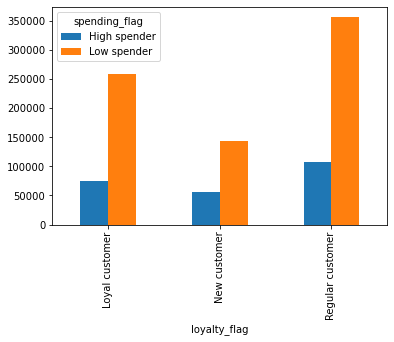

In [93]:
loyalty_avg_price_chart = loyalty_avg_price.plot.bar()

In [95]:
loyalty_avg_price_chart.figure.savefig(os.path.join(file_location, '04 Analysis', 'Visualizations', 'loyalty_avg_price_chart.png'))

# 5. Are there differences in ordering habits based on a customer’s region?

In [ ]:
# Comparing region and loyalty status

In [96]:
region_loyalty = pd.crosstab(instacart_pii['region'], instacart_pii['loyalty_flag'], dropna = False)

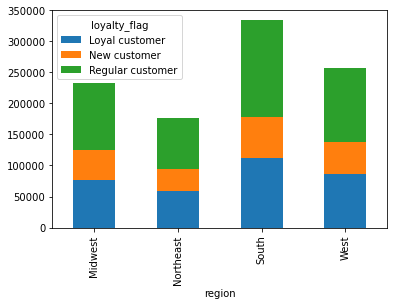

In [97]:
region_loyalty_chart = region_loyalty.plot.bar(stacked = True)

In [118]:
region_loyalty_chart.figure.savefig(os.path.join(file_location, '04 Analysis', 'Visualizations', 'region_loyalty_chart.png'))

## 5. Is there a connection between age and family status in terms of ordering habits?

In [ ]:
# Dependents status and ordering habits

In [100]:
dependents_habits = pd.crosstab(instacart_pii['loyalty_flag'], instacart_pii['dependents_profile'], dropna = False)

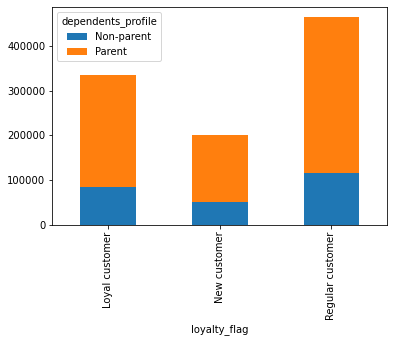

In [101]:
dependents_habits_chart = dependents_habits.plot.bar(stacked = True)

In [102]:
dependents_habits_chart.figure.savefig(os.path.join(file_location, '04 Analysis', 'Visualizations', 'dependents_habits.png'))

In [ ]:
# age relationship with ordering

In [103]:
age_rln_orders = pd.crosstab(instacart_pii['age_profile'], instacart_pii['loyalty_flag'])

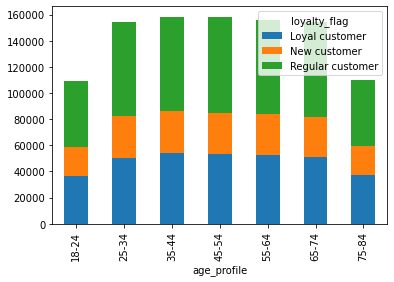

In [105]:
age_rln_orders= age_rln_orders.plot.bar(stacked = True)

In [107]:
age_rln_orders.figure.savefig(os.path.join(file_location, '04 Analysis', 'Visualizations', 'age_rln_orders.png'))

# Task 5  What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

In [ ]:
# Dependency status and order frequency

In [108]:
dependents_frequency = pd.crosstab(instacart_pii['dependents_profile'], instacart_pii['days_since_prior_order'], dropna = False)

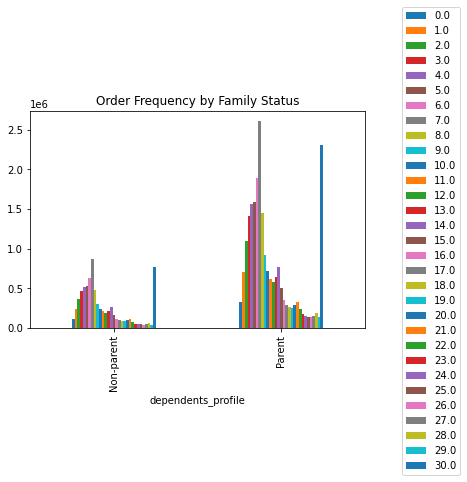

In [109]:
dependents_frequency_chart = dependents_frequency.plot.bar(title = 'Order Frequency by Family Status')
plt.legend(bbox_to_anchor = (1.3, 1.5))

In [110]:
dependents_frequency_chart.figure.savefig(os.path.join(file_location, '04 Analysis', 'Visualizations', 'dependents_frequency.png'))

In [ ]:
# Goods by region

In [111]:
region_goods = pd.crosstab(instacart_pii['goods_profile'], instacart_pii['region'], dropna = False)

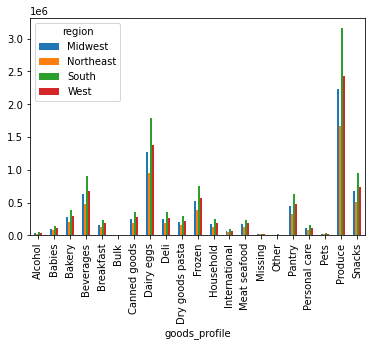

In [112]:
region_goods_chart = region_goods.plot.bar()

In [113]:
region_goods_chart.figure.savefig(os.path.join(file_location, '04 Analysis', 'Visualizations', 'region_goods.png'))

In [ ]:
# Family and loyalty 

In [114]:
fam_loyalty = pd.crosstab(instacart_pii['loyalty_flag'], instacart_pii['fam_status'], dropna = False)

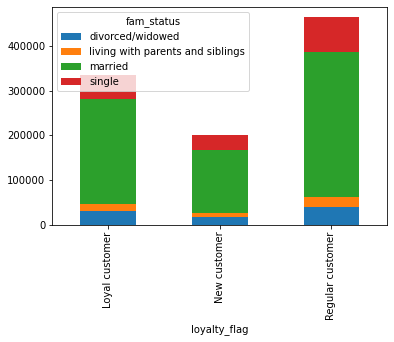

In [115]:
fam_loyalty_chart = fam_loyalty.plot.bar(stacked = True)

In [117]:
fam_loyalty_chart.figure.savefig(os.path.join(file_location, '04 Analysis', 'Visualizations', 'family_loyalty.png'))